#### 1. Постройте график зависимости весов всех признаков от lambda в самописной L2-регуляризации (на данных про ЕГЭ). Сделайте вывод

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

In [3]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [4]:
def standard_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

In [5]:
X_st = X.copy().astype(np.float64)
X_st[:, 1] = standard_scale(X_st[:, 1])
X_st[:, 2] = standard_scale(X_st[:, 2])
X_st[:, 3] = standard_scale(X_st[:, 3])

X_st

array([[ 1.        , -0.70710678, -0.97958969, -0.89625816],
       [ 1.        , -0.70710678, -0.56713087, -0.89625816],
       [ 1.        , -0.35355339, -0.46401617,  0.38411064],
       [ 1.        ,  0.70710678, -0.77336028, -0.89625816],
       [ 1.        ,  0.        ,  0.97958969,  0.38411064],
       [ 1.        , -1.06066017, -0.36090146, -0.89625816],
       [ 1.        ,  0.70710678,  1.08270439,  1.66447944],
       [ 1.        ,  2.47487373,  2.11385144,  1.66447944],
       [ 1.        , -0.70710678, -1.08270439, -0.89625816],
       [ 1.        , -0.35355339,  0.05155735,  0.38411064]])

In [6]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [7]:
def gradient_descent_reg_l2(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W # градиент регуляризации
        
        W -= eta * (dQ + dReg)
        
#         if i % (iterations / 10) == 0:
#             print(f'Iter: {i}, weights: {W}, error {err}')
    
#     print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

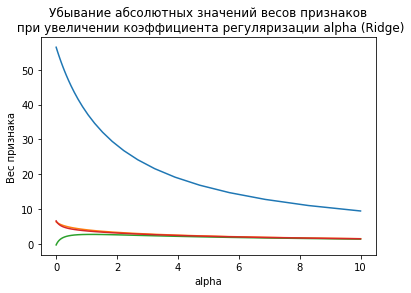

In [8]:
n = 50
alpha_list = np.logspace(-3, 1, n)
coeffs = np.zeros((n, X_st.shape[1]))

for i, alpha in enumerate(alpha_list):
    W = gradient_descent_reg_l2(X_st, y, iterations=5000, eta=1e-1, reg=alpha)
    coeffs[i, :] = W
#     print(f'W: {W} alpha: {alpha}')
        
for i in range(X_st.shape[1]):
    plt.plot(alpha_list, coeffs[:, i])

plt.title('Убывание абсолютных значений весов признаков\n при увеличении коэффициента регуляризации alpha (Ridge)')
plt.xlabel('alpha')
plt.ylabel('Вес признака');

#### 2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

Это не имеет смысла. Каждая из этих операций выполняет свою задачу. Нормализация приводит диапазон данных в промежуток [0, 1], приводя все признаки к одному масштабу, а стандартизация делает среднее = 0, а отклонение = 1. Эти диапазоны не однозначны и решают разные задачи. Нет необходимости делать промежуточное преобразование признаков одной из операций, чтобы получить результат другой.

#### 3. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

In [12]:
def gradient_descent_reg_l1(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * np.sign(W) # градиент регуляризации
        
        W -= eta * (dQ + dReg)
        
#         if i % (iterations / 10) == 0:
#             print(f'Iter: {i}, weights: {W}, error {err}')
    
#     print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

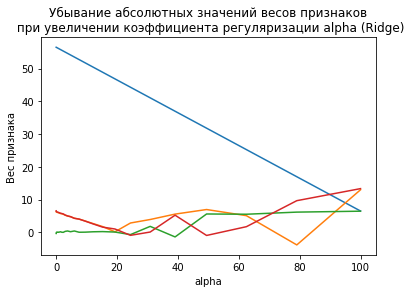

In [13]:
n = 50
alpha_list = np.logspace(-3, 2, n)
coeffs = np.zeros((n, X_st.shape[1]))

for i, alpha in enumerate(alpha_list):
    W = gradient_descent_reg_l1(X_st, y, iterations=5000, eta=1e-1, reg=alpha)
    coeffs[i, :] = W
#     print(f'W: {W} alpha: {alpha}')
       
for i in range(X_st.shape[1]):
    plt.plot(alpha_list, coeffs[:, i])

plt.title('Убывание абсолютных значений весов признаков\n при увеличении коэффициента регуляризации alpha (Ridge)')
plt.xlabel('alpha')
plt.ylabel('Вес признака');